# 📊 Exploratory Data Analysis (EDA) Project

👤 *Name:*Harsh Giri
📅 *Date:* Submission Date 
📂 *Dataset:* Data.csv  

---

## 🎯 Project Objective
The goal of this analysis is to *explore the dataset, identify trends, patterns, anomalies, and validate assumptions*.  
We will perform:
- Data structure exploration  
- Univariate & bivariate analysis  
- Statistical insights  
- Visualization & correlation study  
- Outlier and data quality checks  

---

In [ ]:
# =========================
# 📌 Importing Required Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set_palette("pastel")

pd.set_option("display.max_columns", None)

##  Step 1: Load and Inspect Data
We first load the dataset and check its *shape, structure, data types, and missing values*.

In [ ]:
# Load dataset (replace with your file path if needed)
df = pd.read_csv("Data.csv")

# Basic Overview
print("✅ Shape of Dataset:", df.shape)
print("\n✅ Dataset Info:\n")
print(df.info())
print("\n✅ Missing Values:\n")
print(df.isnull().sum())

df.head()

✅ Shape of Dataset: (50000, 11)

✅ Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None

✅ Missing Values:

Model                   0
Year                    0
Region                  0
Color        

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


##  Step 2: Summary Statistics
We generate descriptive statistics to understand distributions, central tendencies, and spread of data.


In [ ]:
df.describe(include="all")

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


##  Step 3: Univariate Analysis
We explore *single variables* to understand their distribution and frequencies.

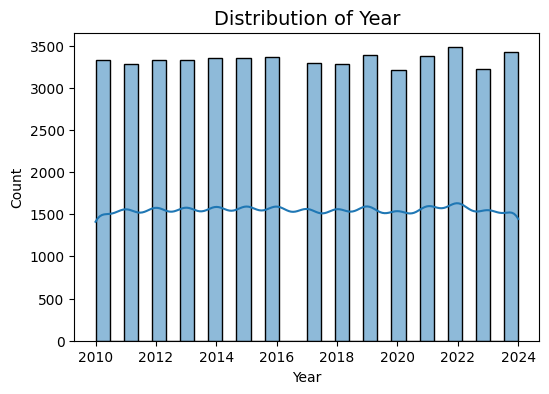

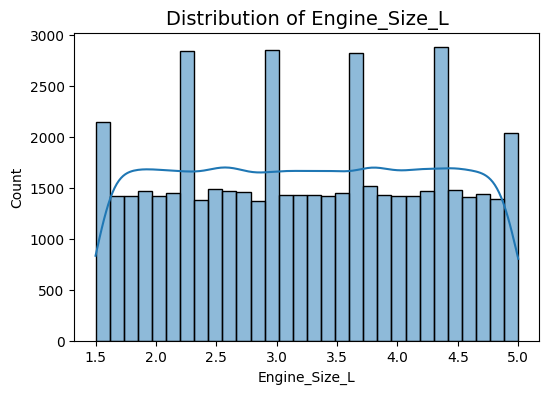

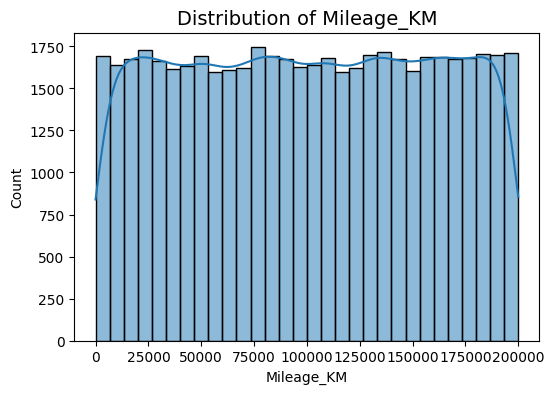

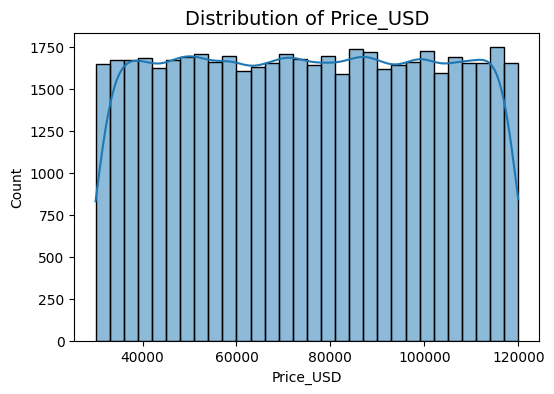

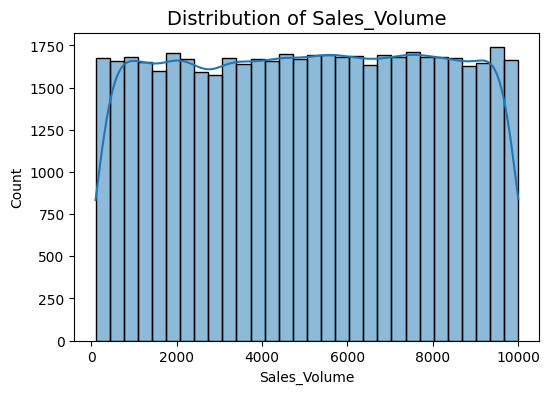

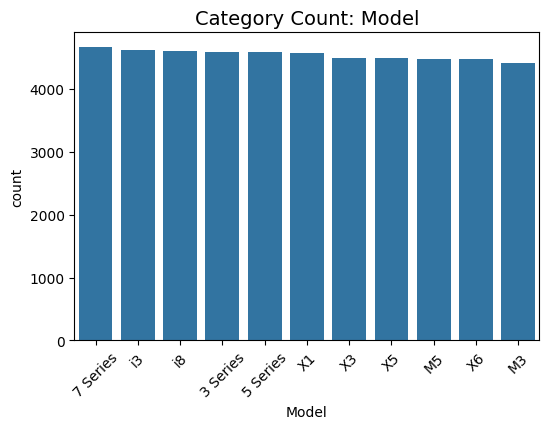

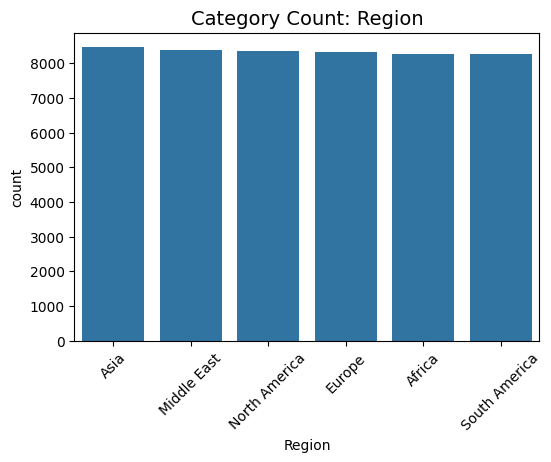

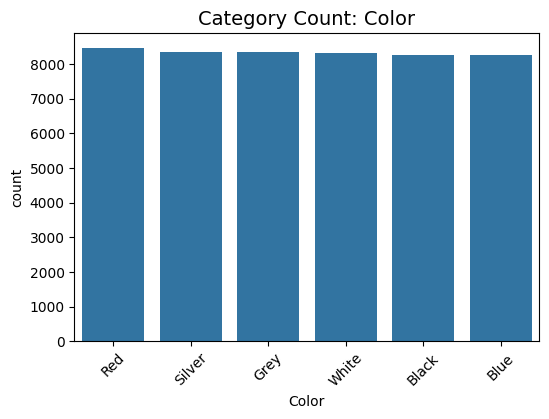

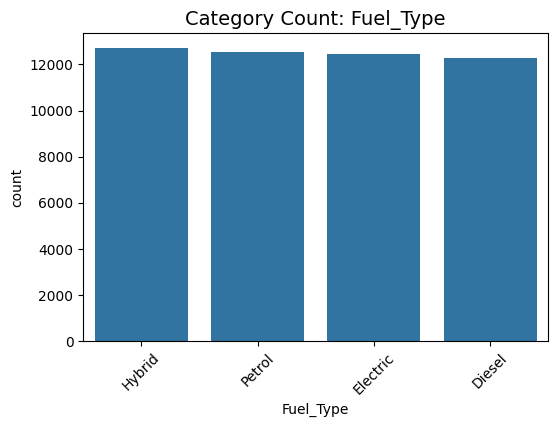

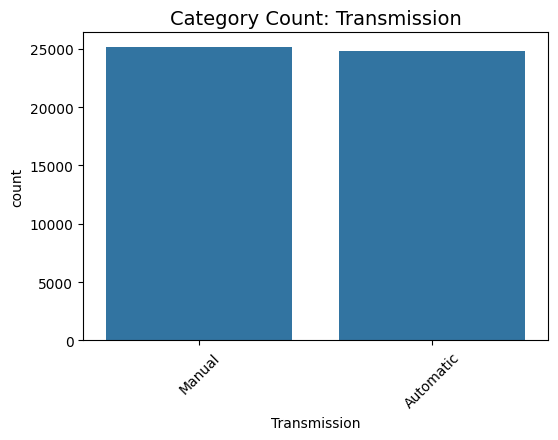

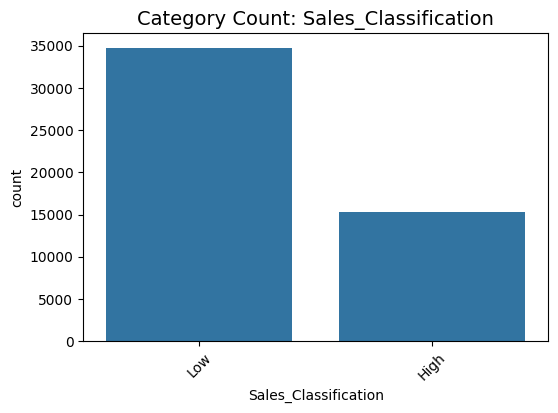

In [ ]:
# Numerical Columns Distribution
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Categorical Columns Countplot
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Category Count: {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

##  Step 4: Bivariate Analysis
We analyze *relationships between numerical and categorical variables*.

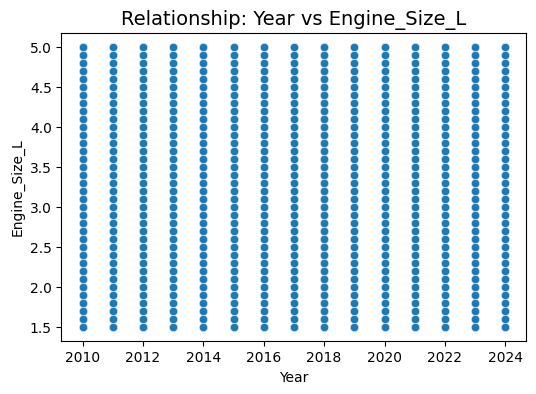

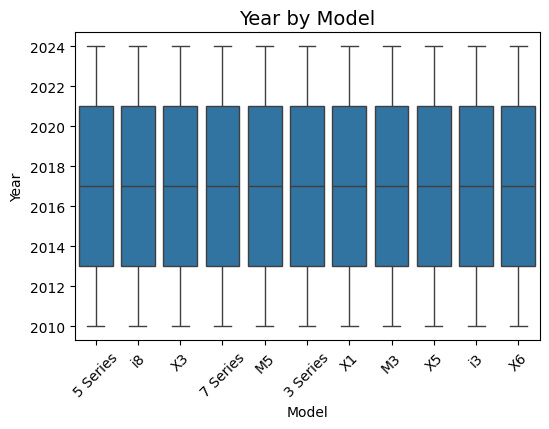

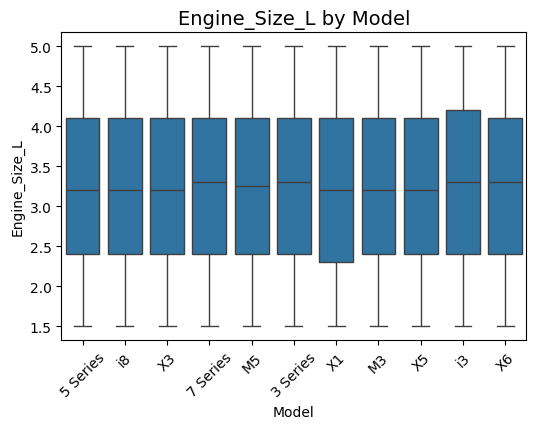

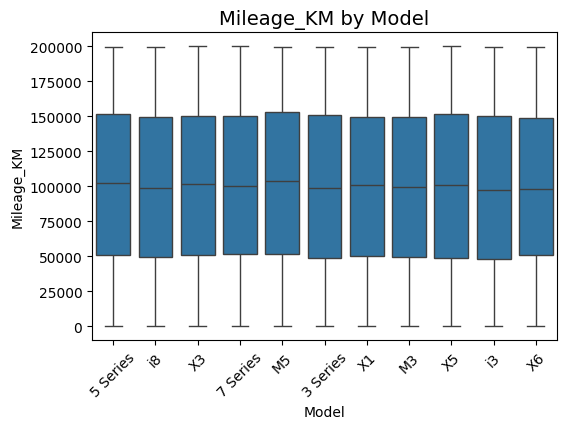

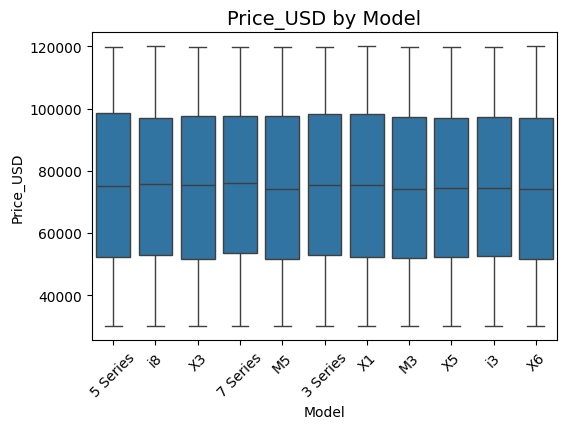

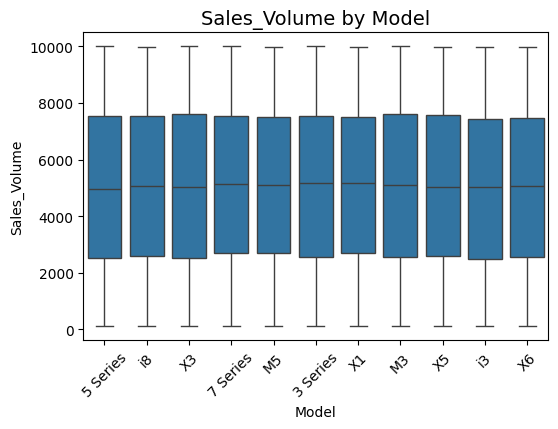

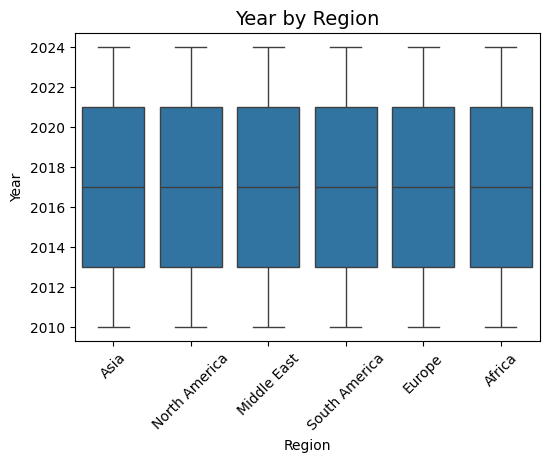

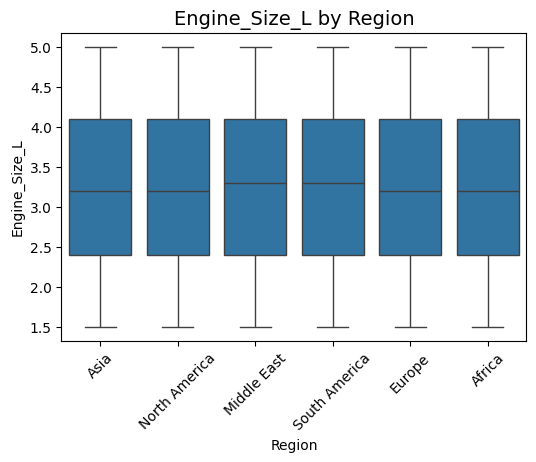

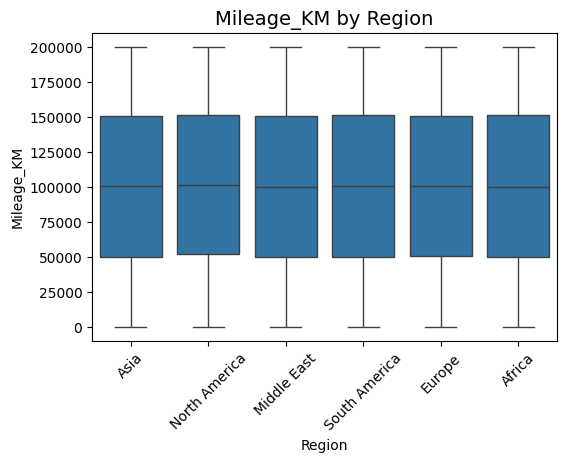

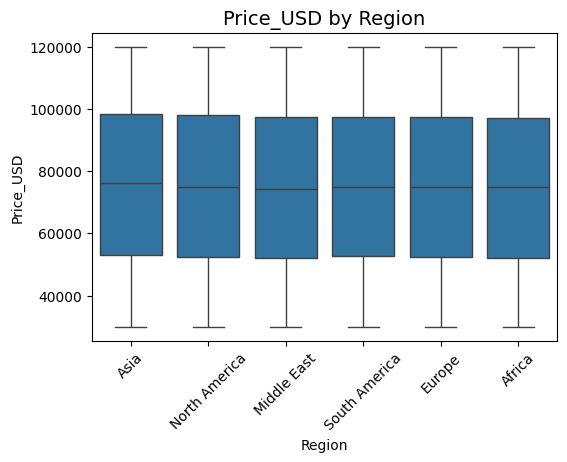

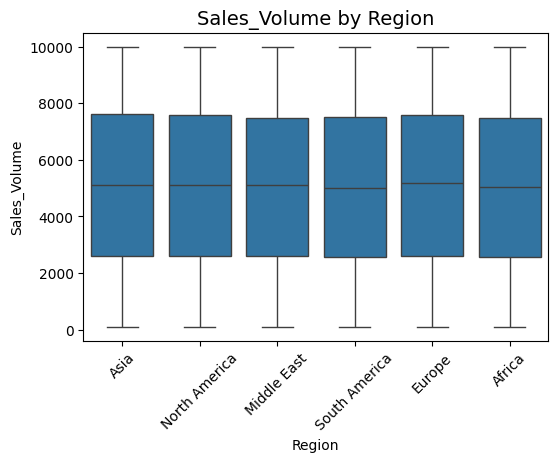

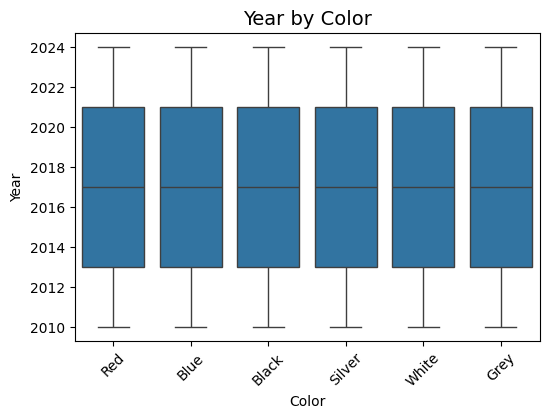

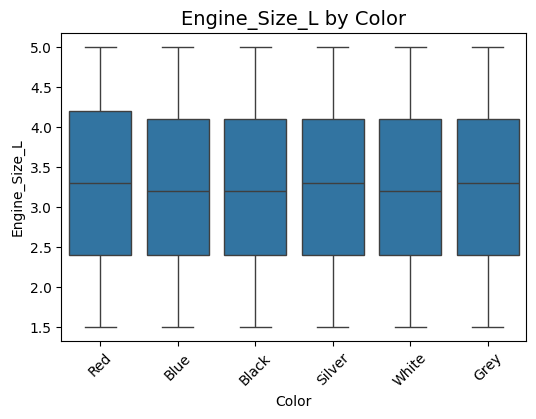

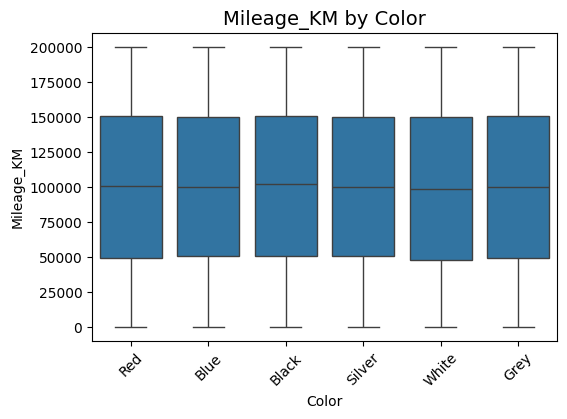

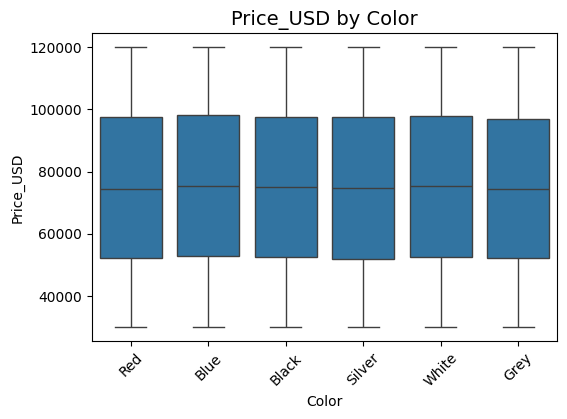

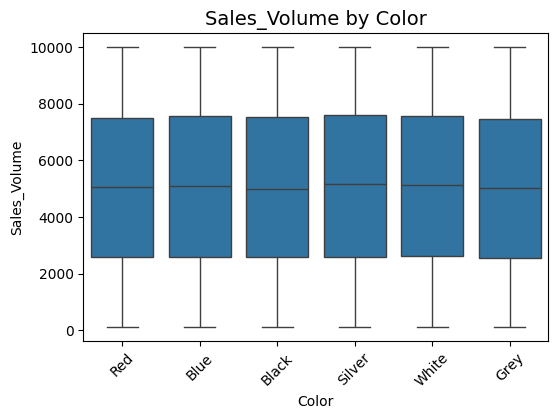

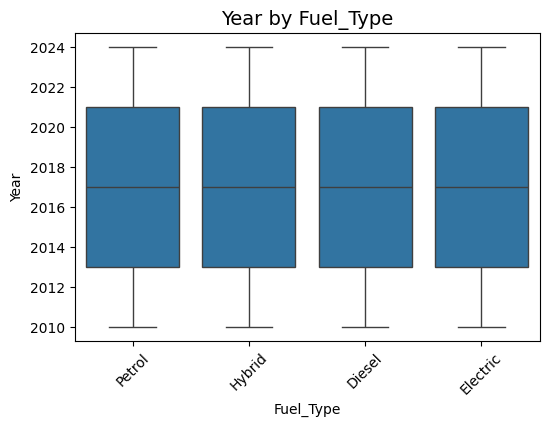

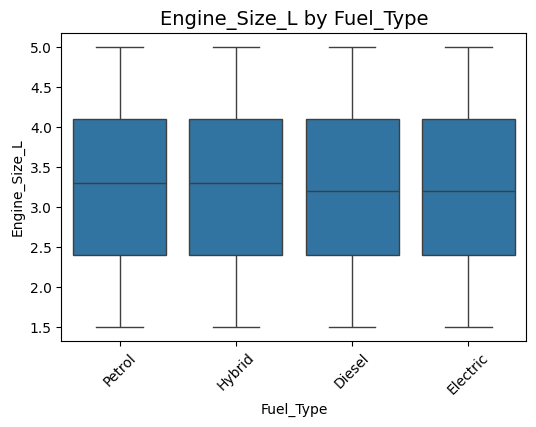

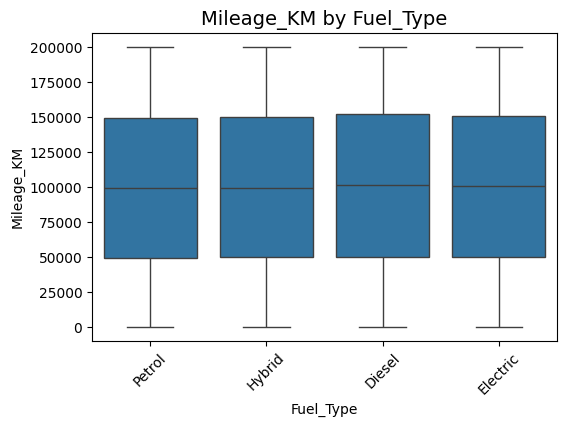

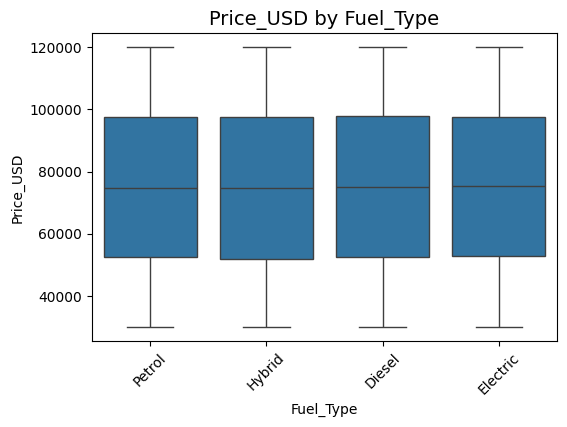

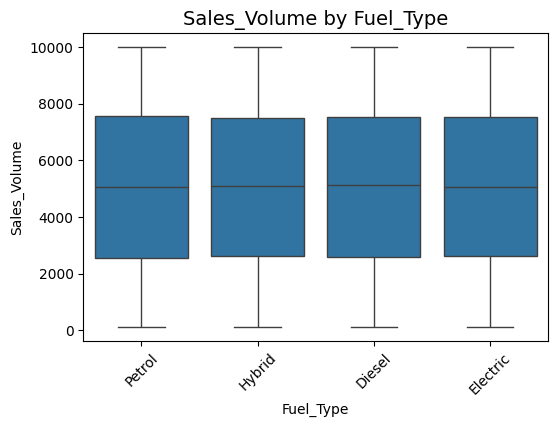

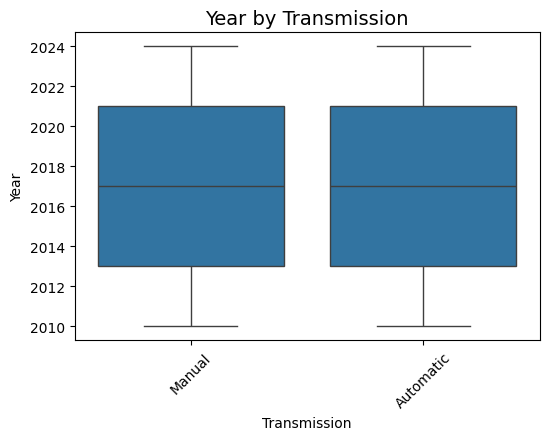

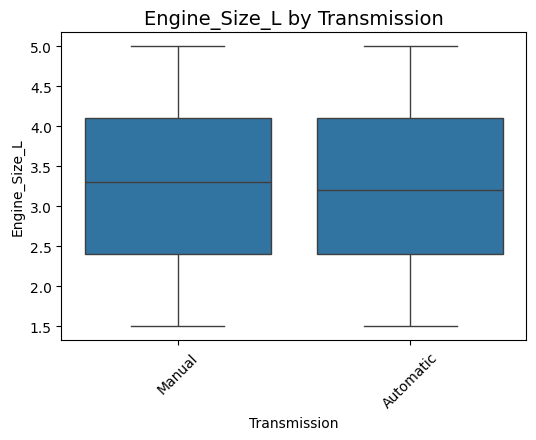

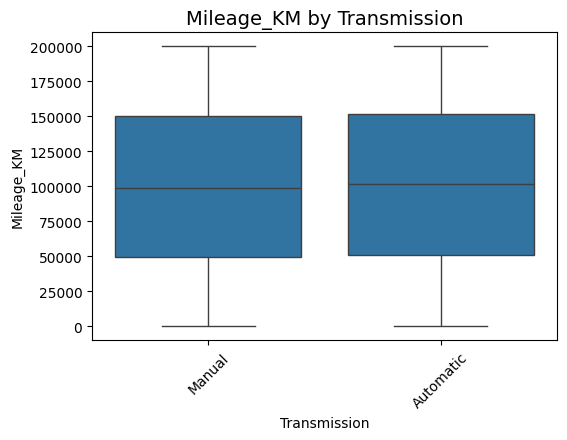

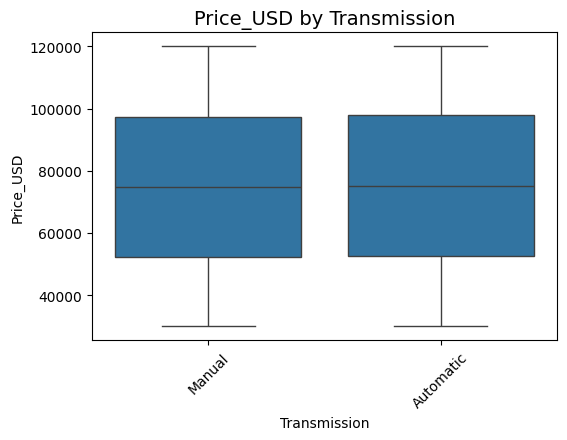

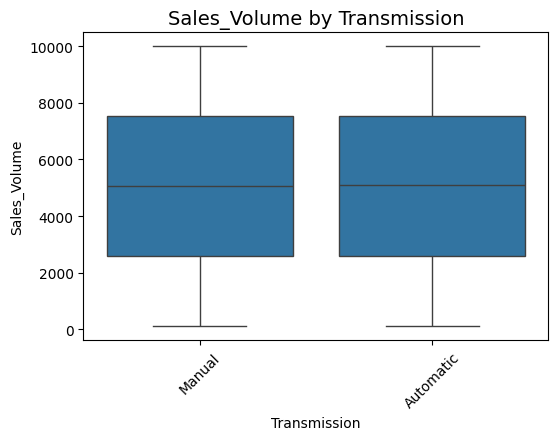

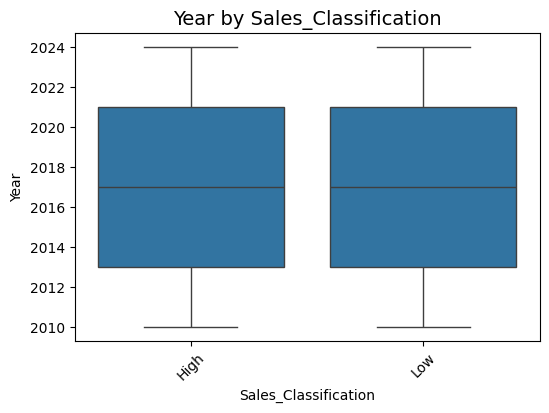

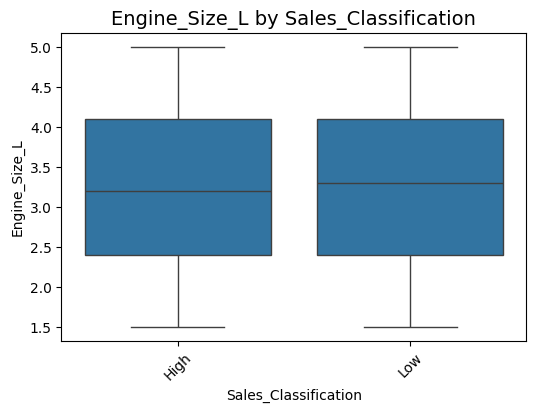

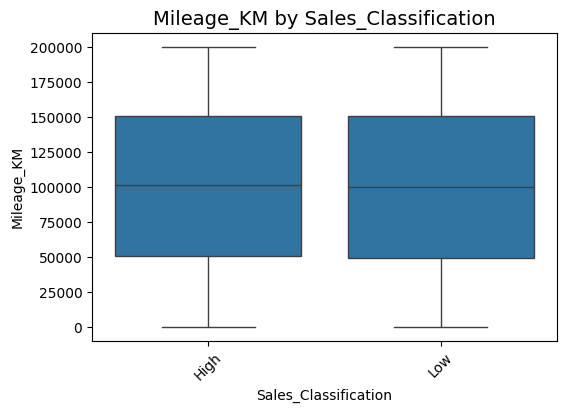

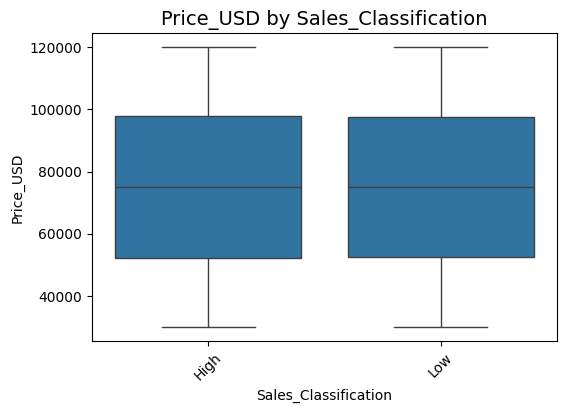

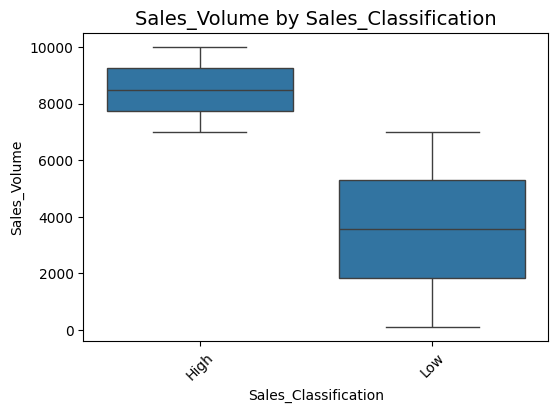

In [ ]:
# Scatter plot between first two numerical columns
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]], alpha=0.7)
    plt.title(f"Relationship: {num_cols[0]} vs {num_cols[1]}", fontsize=14)
    plt.show()

# Boxplots for category vs numeric
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} by {col}", fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

##  Step 5: Correlation Analysis
We check correlations between numerical variables to detect strong relationships.

Correlation Matrix:
                   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Year           1.000000      -0.001944    0.008741   0.003547      0.001671
Engine_Size_L -0.001944       1.000000   -0.004906   0.000146     -0.003942
Mileage_KM     0.008741      -0.004906    1.000000  -0.004238      0.001434
Price_USD      0.003547       0.000146   -0.004238   1.000000      0.000080
Sales_Volume   0.001671      -0.003942    0.001434   0.000080      1.000000


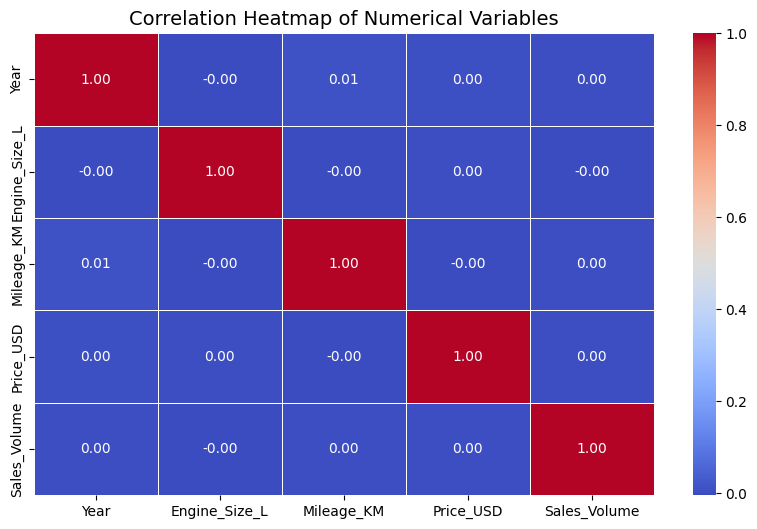


🔥 Strong Correlations (>|0.7|):
Empty DataFrame
Columns: []
Index: []


In [ ]:
# 📌 Correlation Analysis Between Numerical Variables

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data.csv")

num_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

# Detect strong correlations (threshold = 0.7)
threshold = 0.7
strong_corr = corr_matrix[(corr_matrix.abs() >= threshold) & (corr_matrix.abs() < 1.0)]

print("\n🔥 Strong Correlations (>|0.7|):")
print(strong_corr.dropna(how="all").dropna(axis=1, how="all"))

##  Step 6: Outlier Detection
We use boxplots to identify potential *outliers* in numerical variables.

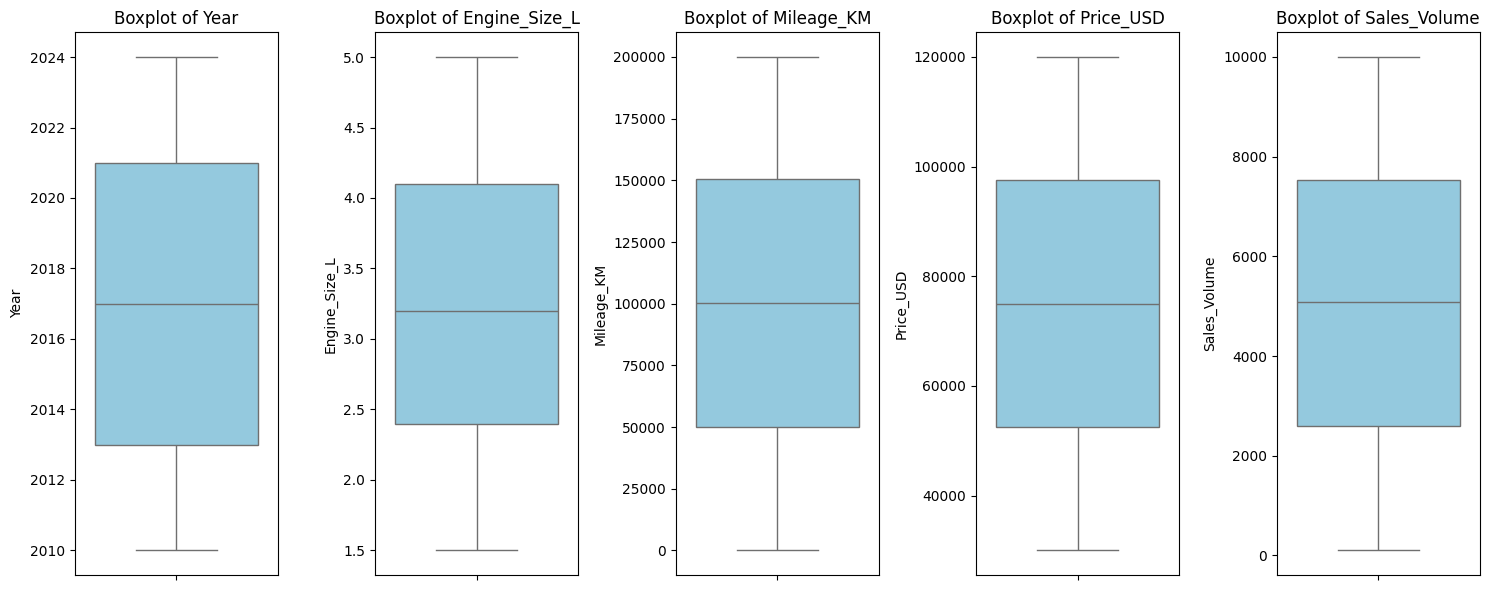


🔎 Outliers detected in 'Year': 0
Empty DataFrame
Columns: [Year]
Index: []

🔎 Outliers detected in 'Engine_Size_L': 0
Empty DataFrame
Columns: [Engine_Size_L]
Index: []

🔎 Outliers detected in 'Mileage_KM': 0
Empty DataFrame
Columns: [Mileage_KM]
Index: []

🔎 Outliers detected in 'Price_USD': 0
Empty DataFrame
Columns: [Price_USD]
Index: []

🔎 Outliers detected in 'Sales_Volume': 0
Empty DataFrame
Columns: [Sales_Volume]
Index: []


In [ ]:
# 📌 Outlier Detection using Boxplots (IQR Method)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data.csv")

num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(1, len(num_df.columns), i)
    sns.boxplot(y=num_df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Detect outliers for each column
for col in num_df.columns:
    outliers = detect_outliers_iqr(num_df, col)
    print(f"\n🔎 Outliers detected in '{col}': {len(outliers)}")
    print(outliers[[col]])

##  Step 7: Data Quality Checks
We visualize missing values and check datatype issues.

📌 Data Types of Columns:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

🔎 Columns stored as 'object' (might need conversion):
      Model         Region  Color Fuel_Type Transmission Sales_Classification
0  5 Series           Asia    Red    Petrol       Manual                 High
1        i8  North America    Red    Hybrid    Automatic                  Low
2  5 Series  North America   Blue    Petrol    Automatic                  Low
3        X3    Middle East   Blue    Petrol    Automatic                  Low
4  7 Series  South America  Black    Diesel       Manual                  Low

📌 Missing Values Summary:
Series([], dtype: int64)


C:\Users\gosai\AppData\Local\Temp\ipykernel_7980\4215328682.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="mako")


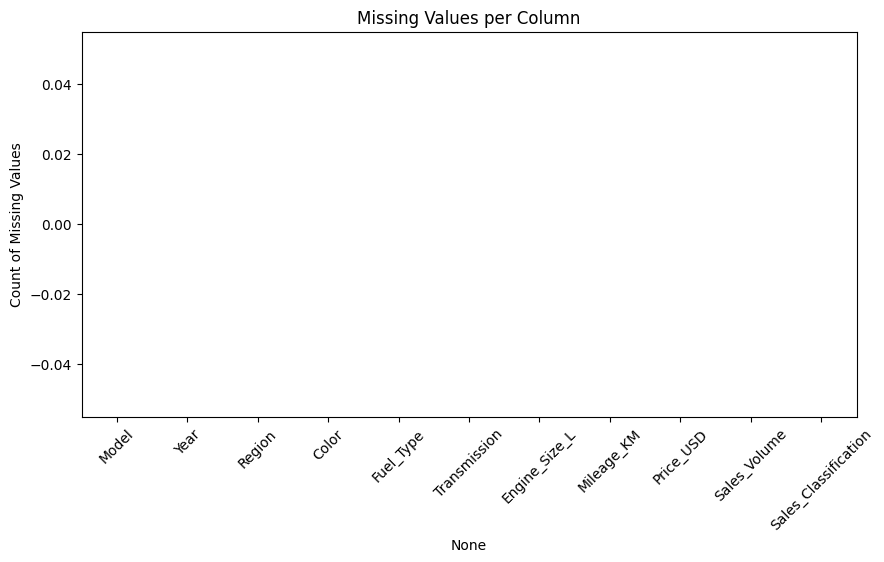

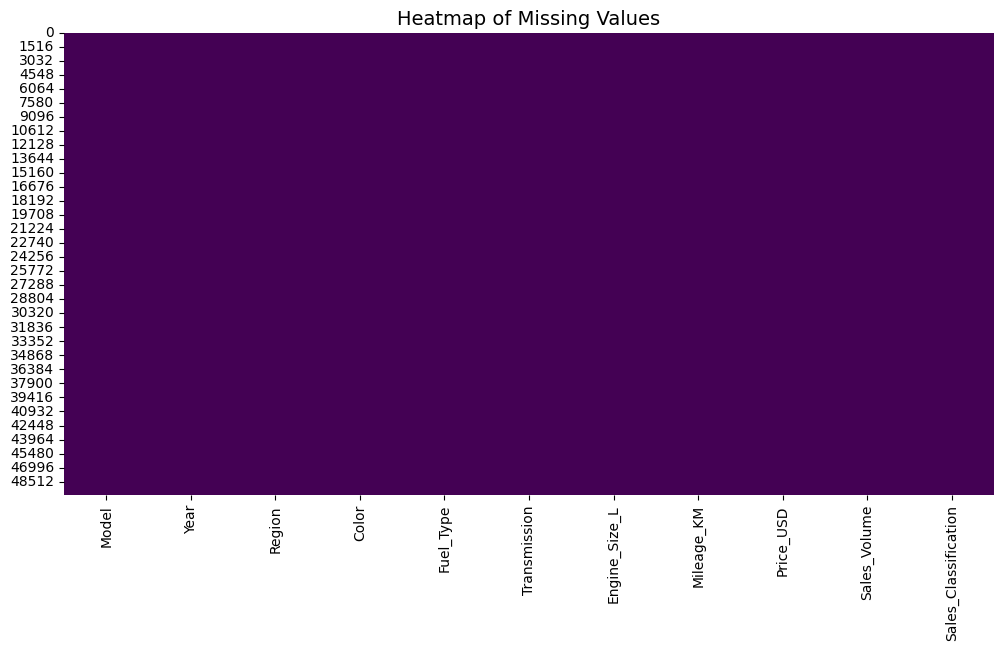

In [ ]:
# 📌 Data Quality Checks: Missing Values & Data Types (Without missingno)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data.csv")

# --- 1. Check Data Types ---
print("📌 Data Types of Columns:")
print(df.dtypes)

# Check if numeric-looking columns are stored as objects
print("\n🔎 Columns stored as 'object' (might need conversion):")
print(df.select_dtypes(include=['object']).head())

# --- 2. Missing Values Summary ---
print("\n📌 Missing Values Summary:")
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])   # only show columns with missing

# --- 3. Visualize Missing Values ---
plt.figure(figsize=(10,5))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="mako")
plt.xticks(rotation=45)
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

# Heatmap of missing values 
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()